# Generating data

This notebook contains a step-by-step walkthrough for data generation. Data are generated using a custom module, [`wiscs`](https://github.com/w-decker/wiscs). This module takes in a set of parameters in the form of a python dictionary. 

There are **three** ways to generate data in this notebook:
1. [Load in some pre-existing parameters and generate data based on these](#loading-in-pre-existing-parameters-and-generating-data)\
This process involves loading in a few pre-made custom parameter files and generating data based on these. There are three options to choose from: 1) parameters that align with the alternative hypothesis described in [Potter & Faulconer (1975)](https://www.nature.com/articles/253437a0), 2) parameters that align with the main hypothesis and 3) parameters that align with the alternative hypothesis that two separate conceptual spaces exist for words and images. 

<div class="alert alert-warning">
  <strong>Warning:</strong> This process does not align with the most recent version of wiscs: <code>wiscs v2.1.0</code>. <br> It is recommended to generate data yourself </br>
</div>

2. [Dynamically generate data using the `ipywidgets` widget](#generate-parameters-and-data-with-ipywidgets)\
This process involves a widget made with `ipywidgets`. This allows the user to manually set parameter values in a hierarchically-esque structured GUI.

<div class="alert alert-warning">
  <strong>Warning:</strong> This process does not align with the most recent version of wiscs: <code>wiscs v2.1.0</code>. <br> It is recommended to generate data yourself </br>
</div>

3. [Modify the parameters dictionary yourself](#generate-your-own-data-by-modifying-the-parameters-dictionary)\
This process involves directly modifying an empty sample parameters dictionary with the values necessary for the simulation code. 

## Recommendations
1. It is necessary that you install `wiscs`. The first cell under [Imports](#imports) installs the module via `pip`.
2. Read the comments in each cell carefully. There are instructions for what code may require modification. 

## Plots
Plots showing the data are located at the [end](#visualizing-the-data) of this notebook.

## Imports

In [1]:
# If you have not installed `wiscs` locally, run this cell
!pip install git+https://github.com/w-decker/wiscs.git # REQUIRED FOR THIS NOTEBOOK

  Cloning https://github.com/w-decker/wiscs.git to /private/var/folders/0c/z85ggvbd1g38q3ftn660791w0000gq/T/pip-req-build-xu8c7i4h
  Running command git clone --filter=blob:none --quiet https://github.com/w-decker/wiscs.git /private/var/folders/0c/z85ggvbd1g38q3ftn660791w0000gq/T/pip-req-build-xu8c7i4h
  Resolved https://github.com/w-decker/wiscs.git to commit e9048c82a0f44fcd41eee825dbda46c0736fceb2
  Preparing metadata (setup.py) ... done


In [1]:
# always run this cell, no matter which method you choose
import wiscs
from wiscs.simulate import DataGenerator
from wiscs.utils import make_tasks
import numpy as np

In [90]:
# if you wish to load in the pre-existing parameters, run this cell
from src.utils import load_params, base
import os

In [91]:
# if you wish to use the `ipywidgets` tool, then run this cell
import ipywidgets as widgets
from src.wiscs_widgets import wiscs_widget
from src.utils import extract_params_from_widget

## Loading in pre-existing parameters and generating data

In [6]:
# there are three different parameter sets to choose from. To see them run this cell
base(os.listdir('../config'), [])

['Potter1975', 'Main', 'Alt']

In [4]:
# if you wish to load in the pre-existing parameters, modify + run this cell

# do you want to see ALL the parameter files?
######################################################
load_in_all_params = True # <-- CHANGE THIS AS NEEDED | True or False
######################################################

# do you want to load in ALL the files as a SINGLE dictionary object?
# NOTE: this can only be true if `load_in_all_params` is True
############################################################
load_in_as_single_object = False # <-- CHANGE THIS AS NEEDED | True or False
############################################################

if not load_in_all_params:
    file_tags = base(os.listdir("../config"), [])
    print(f'If you wish to load a single param, choose from the following:\n \
          {file_tags}')

In [5]:
# if you wish to load in the pre-existing parameters, modify + run this cell
if load_in_all_params:
    if load_in_as_single_object:
        print('Loading in all parameters as a single object...')
        params = load_params(path='../config', all=True, merge=True)
    else:
        print('Loading in all parameters as separate objects...')
        potter1975, main, alt = params = load_params(path='../config', all=True, merge=False)
elif not load_in_all_params:     
    
    ################################################
    fname = 'Potter1975' # <-- CHANGE THIS AS NEEDED | For example, "Potter1975", "Main" or "Alt" (as type str)
    ################################################
    
    print(f'Loading in {fname} parameters...') 
    param = load_params(path='../config', fname=fname, all=False, merge=False)

Loading in all parameters as separate objects...


In [11]:
# If you are satisfied with the parameters and are ready to generate data, modify + run this cell

#####################
param_to_load = main # <-- CHANGE THIS AS NEEDED | For example, `potter1975` (variable) or params['potter1975']
#####################
  
wiscs.set_params(param_to_load)
DG = DataGenerator()
DG.fit_transform()

Params set successfully


/opt/homebrew/anaconda3/envs/wiscs-stats/lib/python3.12/site-packages/wiscs/simulate.py:28: UserWarning: Tasks parameters are different. Generating data for ALTERNATIVE hypothesis.
  warnings.warn("Tasks parameters are different. Generating data for ALTERNATIVE hypothesis.")


In [12]:
# If you wish to save the data, modify + run this cell

########################################
output_name = "simulated_Main_data.csv" # <-- CHANGE THIS AS NEEDED | For example, "simulated_Main_data.csv"
########################################

DG.to_pandas().to_csv(f'../data/{output_name}', index=False)

## Generate parameters and data with `ipywidgets`

The widget is structured as follows. 

```bash
WISCS_WIDGET
├── **Cognitive Parameters**
│   ├── Word -> Perceptual
│   ├── Image -> Perceptual
│   ├── Word -> Conceptual
│   ├── Image -> Conceptual
│   └── Tasks
│       ├── Range of tasks parameters
│       ├── Number of tasks 
│       ├── Copy?
├── **Variance Parameters**
│   ├── Word
│   ├── Image
│   ├── Question
│   └── Participant
├── **Experiment Parameters**
│   ├── Number of Participants
│   ├── Number of items 
│   ├── Number of tasks 
│   └── Design
│       ├── within
│       └── between
```

Below is a desription of each in tabular format

| Tab | Description | 
| --- | ----------- |
| **Cognitive Parameters** | --- |
| Word -> Perceptual | Expected value: integer. The theoretical value for activating the perceptual representation of a word |
| Image -> Perceptual | Expected value: integer. The theoretical value for activating the perceptual representation of an image |
| Word -> Conceptual | Expected value: integer. The theoretical value for activating the conceptual representation of a word |
| Image -> Conceptual | Expected value: integer. The theoretical value for activating the conceptual representation of an image |
| Tasks | This generates a random permutation of values between a desired range, corresponging to the task parameter for each question. You must also specify the number of tasks. Additionally, you may select whether to "copy" these values, which means that an identical array of task parameters will be created for both word and image. This is inline with the MAIN hypothesis. If not selected, then two different arrays will be used for word and image taske parameters | 
| **Variance Parameters** | --- | 
| Word | Expected value: integer or float. $\sigma^2$ for word | 
| Image | Expected value: integer or float. $\sigma^2$ for image | 
| Question | Expected value: integer or float. $\sigma^2$ for question | 
| Participant | Expected value: integer or float. $\sigma^2$ for participant | 
| **Experiment Parameters** | --- | 
| Number of particpants | Expected value: integer. The number of participants to include in the study | 
| Number of items | Expected value: integer. The number of items. E.g., if set to 45, participants will see 45 images and 45 words. |  
| Number of tasks | Expected value: integer. The number of questions seen by participants. | 
| Design | Whether **items** is a within or between subjects variable |


In [92]:
# to load the widget, run this cell

# fill out the necessary information in the tabs and dropdowns. 
w = wiscs_widget
w

In [18]:
# If you are satisfied with the parameters and are ready to generate data, run this cell
wiscs.set_params(
    extract_params_from_widget(w)
    )
DG = DataGenerator()
DG.fit_transform()

Params set successfully


In [14]:
# If you wish to save the data, modify + run this cell

########################################
output_name = "simulated_data.csv" # <-- CHANGE THIS AS NEEDED | For example, "simulated_data.csv"
########################################

DG.to_pandas().to_csv(f'../data/{output_name}', index=False)

## Generate your own data by modifying the parameters dictionary

In [13]:
# If you wish to generate data based on parameters you wish to define directly in the code, modify + run this cell
task = make_tasks(100, 200, 15)
main = True
########################################################################################
main_params = {
    'word.perceptual': 100,
    'image.perceptual': 90,

    'word.conceptual': 100,
    'image.conceptual': 130,

    'word.task': task if main else make_tasks(100, 300, 15),
    'image.task': task if main else make_tasks(100, 300, 15),

    'var.trial': 75,
    'var.question':20,
    'var.subject': np.array([[50.0, 10],
                              [10, 80.0]]),
    "var.error": 50,

    'n.subject': 100,
    'n.question': 15,
    'n.trial': 20,
}

alt_params = {
    'word.perceptual': 100,
    'image.perceptual': 90,

    'word.conceptual': 100,
    'image.conceptual': 130,

    'word.task': make_tasks(100, 300, 15),
    'image.task': make_tasks(100, 300, 15),

    'var.trial': 75,
    'var.question':20,
    'var.subject': np.array([[30.0, 0],
                              [0, 20.0]]),
    "var.error": 50,


    'n.subject': 100,
    'n.question': 15,
    'n.trial': 20,
}
########################################################################################

In [14]:
# If you are satisfied with the parameters and are ready to generate data, run this cell
wiscs.set_params(main_params)
DG = DataGenerator()
AltDG = DataGenerator()
DG.fit_transform()
AltDG.fit_transform(params=alt_params, overwrite=True)

Params set successfully


/opt/homebrew/anaconda3/envs/wiscs-stats/lib/python3.12/site-packages/wiscs/simulate.py:117: UserWarning: Simulating data for MAIN hypothesis.
  warnings.warn("Simulating data for MAIN hypothesis.")


In [15]:
# If you wish to save the data, modify + run this cell

########################################
output_name1 = "simulated_shared.csv" # <-- CHANGE THIS AS NEEDED | For example, "simulated_data.csv"
output_name2 = "simulated_separate.csv" # <-- CHANGE THIS AS NEEDED | For example, "simulated_data.csv"
########################################

DG.to_pandas().to_csv(f'../data/{output_name1}', index=False)
AltDG.to_pandas().to_csv(f'../data/{output_name2}', index=False)

## Visualizing the data
`wiscs` comes with some default plotting options. The `.plot_bargraph()` method from the `Plot()` class is probably the best way to visualize the data: you can clearly discern between the data which has an interaction of question and one that does not. 

In [16]:
from wiscs.plotting import Plot
P = Plot(DG) # <-- CHANGE THIS AS NEEDED | The `Plot()` class takes in the `DataGenerator()` object
AltP = Plot(AltDG)

/opt/homebrew/anaconda3/envs/wiscs-stats/lib/python3.12/site-packages/wiscs/plotting.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby(['question', 'modality'], as_index=False).mean()


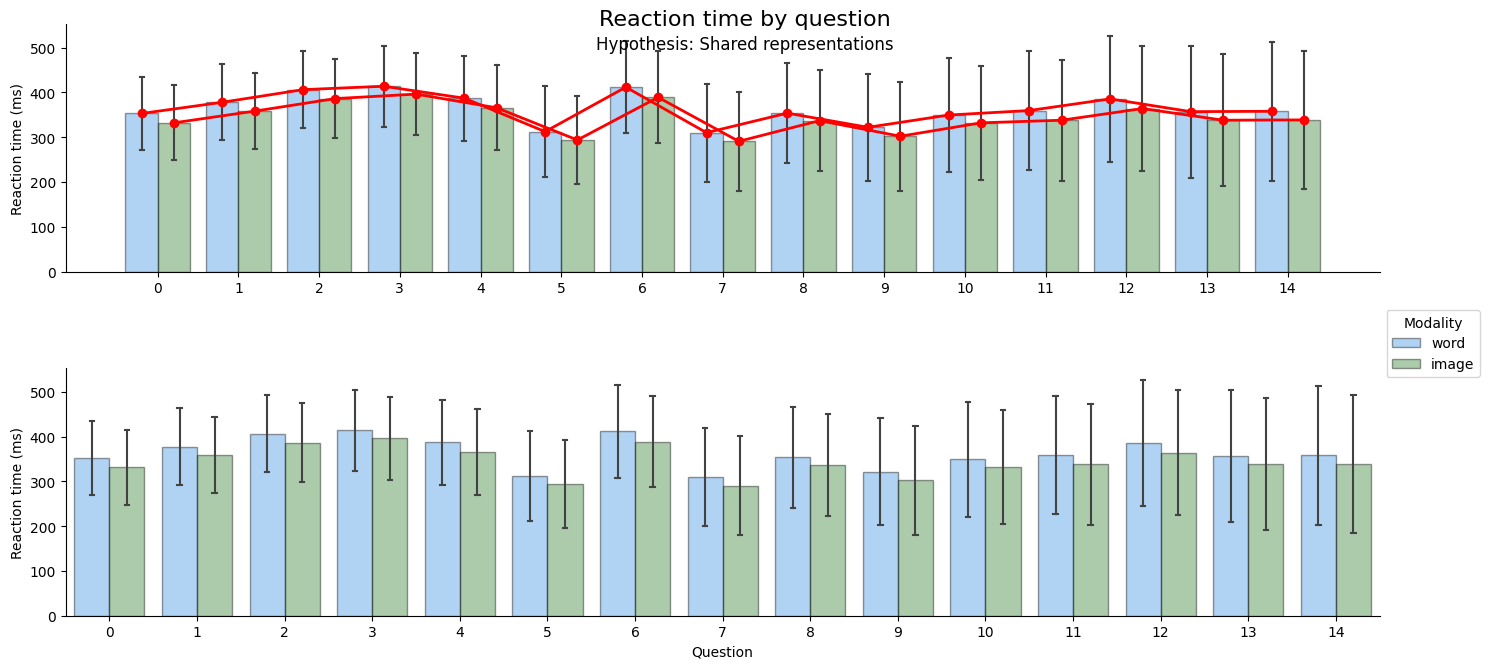

In [17]:
P.plot_bargraph(title="Reaction time by question", hypothesis_title="Hypothesis: Shared representations")

/opt/homebrew/anaconda3/envs/wiscs-stats/lib/python3.12/site-packages/wiscs/plotting.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby(['question', 'modality'], as_index=False).mean()


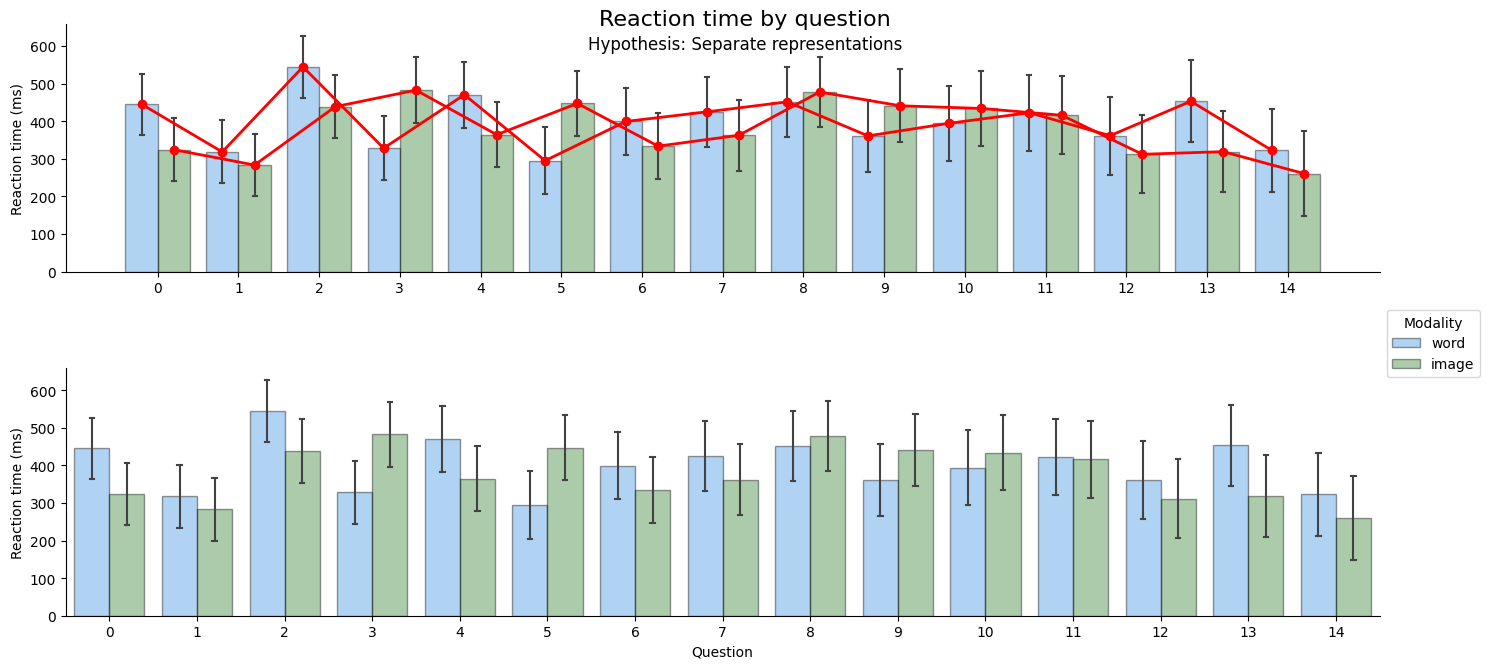

In [18]:
AltP.plot_bargraph(title="Reaction time by question", hypothesis_title="Hypothesis: Separate representations")